---
title: Scipy Optimization Example
---

This short example shows you how to use the scipy minimize function to identify model parameters.  This example is set up similarly to the linear least squares example for consistency.  Being able to define pretty much anything in a python function, however, gives you great power to customize this, as opposed to a specific approach like linear least squares.

First, we import all the necessary modules

In [1]:
%matplotlib inline
import numpy
import numpy.random
import matplotlib.pyplot as plt
import numpy.linalg
import scipy.optimize

Next create the x matrix

In [2]:
x = numpy.r_[-10:10:.5]

Next, define a y vector based on some model.  Note: you can use any of these models or add them together.  We scale the output in this example to eliminate the natural weighting of each of these functions over the given range.

In [3]:
#y = x
y = x**2
#y = x**3
#y = numpy.sin(x)
y /= y.max()

Add some noise to y:

In [4]:
rand = numpy.random.randn(*y.shape)/10
y_rand = y + rand

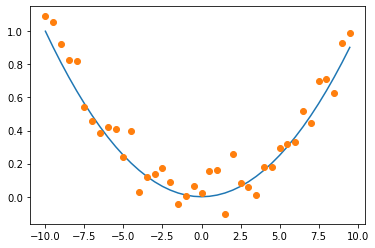

In [5]:
plt.plot(x,y)
plt.plot(x,y_rand,'o')

Create an A matrix consisting of several different models

In [6]:
A = numpy.array([(x),(x)**2,(x)**3,numpy.sin(x)]).T

Now create a function that outputs the sum of squared error of each model applied to the given x.  In this case we are solving for the weighting coefficients, $k$, as in the linear least squares example:

In [7]:
def myfunc(k):
    # make sure our coefficients are in the form of a numpy array
    k = numpy.array(k)
    # generate y* = Ak^T
    y_model = A.dot(k.T)
    # sum the square of the error of our model against the input data, y_rand
    error = ((y_model-y_rand)**2).sum()
    #return the error
    return error

Create an initial guess for each of the weights.  In this case we just give each coefficient the value of 1 as an initial guess

In [8]:
ini = [1]*A.shape[1]
ini

[1, 1, 1, 1]

Now, call the minimize function.  The first value should be the function you are trying to minimize, and the 
For more information see the optimization function [page](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)

In [9]:
sol = scipy.optimize.minimize(myfunc,ini)
sol

      fun: 0.29336548348717617
 hess_inv: array([[ 2.35078351e-03, -1.23710160e-05, -3.31813423e-05,
         4.86251949e-04],
       [-1.23710160e-05,  6.46844761e-06,  3.00084328e-07,
        -3.66529338e-05],
       [-3.31813423e-05,  3.00084328e-07,  5.62458836e-07,
        -1.91576150e-05],
       [ 4.86251949e-04, -3.66529338e-05, -1.91576150e-05,
         2.78470176e-02]])
      jac: array([3.7252903e-09, 3.7252903e-09, 3.7252903e-09, 0.0000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 65
      nit: 9
     njev: 13
   status: 0
  success: True
        x: array([-1.13654781e-03,  1.09398078e-02, -2.22292008e-05,  1.93916411e-02])

```sol.x``` contains the solution for $k$

In [10]:
k_optimum = sol.x
k_optimum

array([-1.13654781e-03,  1.09398078e-02, -2.22292008e-05,  1.93916411e-02])

[Text(0, 0, '$x$'),
 Text(1, 0, '$x^2$'),
 Text(2, 0, '$x^3$'),
 Text(3, 0, '$\\sin(x)$')]

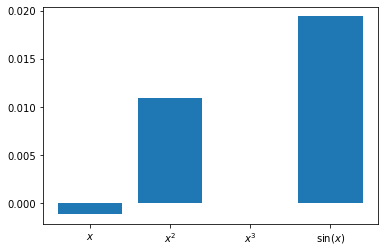

In [11]:
xx = numpy.r_[:4]
labels = '$x$','$x^2$','$x^3$','$\sin(x)$'
f = plt.figure()
ax = f.add_subplot()
ax.bar(xx,k_optimum)
ax.set_xticks(xx)
ax.set_xticklabels(labels)

Now generate $y^*$

In [12]:
y_model = A.dot(k_optimum.T)

Plot the model against the input data

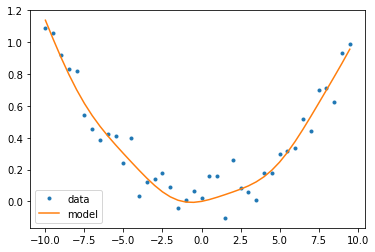

In [13]:
fig = plt.figure()
ax = fig.add_subplot()
a = ax.plot(x,y_rand,'.')
b = ax.plot(x,y_model)
ax.legend(a+b,['data','model'])

And plot the residual as well

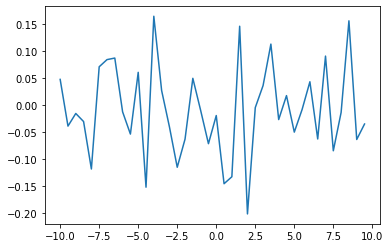

In [14]:
plt.figure()
plt.plot(x,y_model-y_rand)

Now try other models, higher resolution data, and different domains